
# Spatial of differences in climatological Rx1day with significant test

1. Reference dataset: regional dataset
2. Period: climatological period (2001-2015) or 2001-2016 depending on regions
4. K-S Test for significant difference in distributions
5. MK test for significant difference in mean values
Note: Data masked by REGEN_ALL (grid points with 80% data availability over 1950-2016) integrated with land_sea_mask from IPCC 

In [12]:
# Import modules
%matplotlib inline
%run /g/data/w40/pn3424/2024/Lisa/Python/Code/Master_functions_Lisa.ipynb
import xarray as xr
import pymannkendall as mk
import fnmatch
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as mticker
import matplotlib.gridspec as gridspec
from scipy import stats
from scipy.stats import ks_2samp
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

Shape of p-values array: (10, 10)


## Define spatiotemporal boundaries

In [13]:
# Define region of interest (lat and lon boundaries for all of big region of interest e.g. Monsoon Asia, Australia, Africa... )
lat_slice = slice(-15,50)
lon_slice = slice(60,150)

# Define temporal scale for SPI variable (1 for 3-months, 2 for 6-months, 3 for 12-months); use "None" if not using the SPI variable
iscale = None

# Define season as a list of month numbers. If not wanting a seasonal breakdown, use None.
# Suggestions: Wet 6-month: [10,11,12,1,2,3]; Dry 6-month: [4,5,6,7,8,9]; Wet 3-month: [12,1,2]; Dry 3-month: [6,7,8]
season = None
season_name = 'Annual'

# Define mask for regions

mask_ds = xr.open_dataset('/g/data/w40/pn3424/2024/Lisa/mask/land_sea_mask_combined_1degree.nc')

land_mask = mask_ds.sftlf.sel(lat=lat_slice, lon=lon_slice)



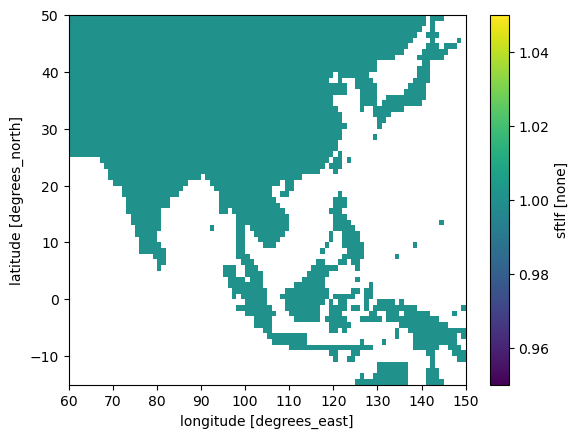

In [14]:
land_mask.plot()

## Define Keywords for Data/Data paths

In [15]:
# Define keywords to be used with f-strings to build the path to datasets
variable = 'rx1day'
temporal_resolution='yr'


# Define paths to data
global_path = '/g/data/w40/pn3424/2024/Lisa/data'
regional_path='/g/data/w40/pn3424/2024/Lisa/climpact'

global_path = global_path + f"/{variable}/{temporal_resolution}/"
regional_path = regional_path + f"/{variable}_ANN_1degree_APHRODITE_MA_1951-2015.nc"

## Get Pandas Dataframe with complete list of model dataset file paths

In [16]:
data_paths = get_data_files(global_path)
pd.set_option('display.max_colwidth', None)
data_paths

,dataset,dataset_path
0,COSCH,/g/data/w40/pn3424/2024/Lisa/data/rx1day/yr/rx1day_yr_COSCH_2000-2021.nc
1,None,/g/data/w40/pn3424/2024/Lisa/data/rx1day/yr/EAU
2,TAPEER_v1.5,/g/data/w40/pn3424/2024/Lisa/data/rx1day/yr/rx1day_yr_TAPEER_v1.5_2011-2021.nc
3,3B42RT_v7.0,/g/data/w40/pn3424/2024/Lisa/data/rx1day/yr/rx1day_yr_3B42RT_v7.0_2001-2019.nc
4,None,/g/data/w40/pn3424/2024/Lisa/data/rx1day/yr/rx1day_yr_REGEN_LONG_V1-2019_1950-2016.nc
5,ERA5,/g/data/w40/pn3424/2024/Lisa/data/rx1day/yr/rx1day_yr_ERA5_1979-2022.nc
6,MERRA1,/g/data/w40/pn3424/2024/Lisa/data/rx1day/yr/rx1day_yr_MERRA1_1979-2015.nc
7,IMERG_V06_FC,/g/data/w40/pn3424/2024/Lisa/data/rx1day/yr/rx1day_yr_IMERG_V06_FC_2001-2021.nc
8,TAMSAT_v3,/g/data/w40/pn3424/2024/Lisa/data/rx1day/yr/rx1day_yr_TAMSAT_v3_1983-2022.nc
9,REGEN_ALL_2019,/g/data/w40/pn3424/2024/Lisa/data/rx1day/yr/rx1day_yr_REGEN_ALL_2019_1950-2016.nc


### Defining subset

In [17]:
insitu_names = ["CPC_v1.0","GPCC_FDD_v2022","REGEN_ALL_2019"]
satellite_names=["CHIRPS_v2.0","CMORPH_v1.0_CRT","GIRAFE","GPCP_V3.2", "GSMAP-NRT-gauges-v8.0","IMERG-v07B-FC","PERSIANN_v1_r1"]
reanalysis_names=["CFSR","ERA5","JRA-55","MERRA2"]
regional_names='APHRODITE'

In [18]:
insitu_paths_subset = get_data_files_subset(data_paths, insitu_names).sort_values('data_name')
satellite_paths_subset = get_data_files_subset(data_paths, satellite_names).sort_values('data_name')
reanalysis_paths_subset = get_data_files_subset(data_paths, reanalysis_names).sort_values('data_name')

In [19]:
satellite_paths_subset

,data_name,dataset_path
3,CHIRPS_v2.0,/g/data/w40/pn3424/2024/Lisa/data/rx1day/yr/rx1day_yr_CHIRPS_v2.0_1981-2022.nc
0,CMORPH_v1.0_CRT,/g/data/w40/pn3424/2024/Lisa/data/rx1day/yr/rx1day_yr_CMORPH_v1.0_CRT_1998-2021.nc
1,GIRAFE,/g/data/w40/pn3424/2024/Lisa/data/rx1day/yr/rx1day_yr_GIRAFE_1deg_historical_2002-2022.nc
2,GPCP_V3.2,/g/data/w40/pn3424/2024/Lisa/data/rx1day/yr/rx1day_yr_GPCP_V3.2_2000-2020.nc
5,GSMAP-NRT-gauges-v8.0,/g/data/w40/pn3424/2024/Lisa/data/rx1day/yr/rx1day_yr_GSMAP-NRT-gauges-v8.0_his_1deg_2001-2023.nc
4,IMERG-v07B-FC,/g/data/w40/pn3424/2024/Lisa/data/rx1day/yr/rx1day_yr_IMERG-v07B-FC_his_1deg_2001-2023.nc
6,PERSIANN_v1_r1,/g/data/w40/pn3424/2024/Lisa/data/rx1day/yr/rx1day_yr_PERSIANN_v1_r1_1983-2021.nc


## IPCC regional mask and identifying regions of interests according to updated in AR6 IPCC

For definition of regions: please refer  https://regionmask.readthedocs.io/en/stable/defined_scientific.html and https://essd.copernicus.org/articles/12/2959/2020/#&gid=1&pid=1

In [20]:
import regionmask
ipcc_mask_ds=xr.open_dataset("/g/data/w40/pn3424/2024/Lisa/mask/land_sea_mask_combined_1degree.nc")
ipcc_mask=regionmask.defined_regions.ar6.land.mask(ipcc_mask_ds)

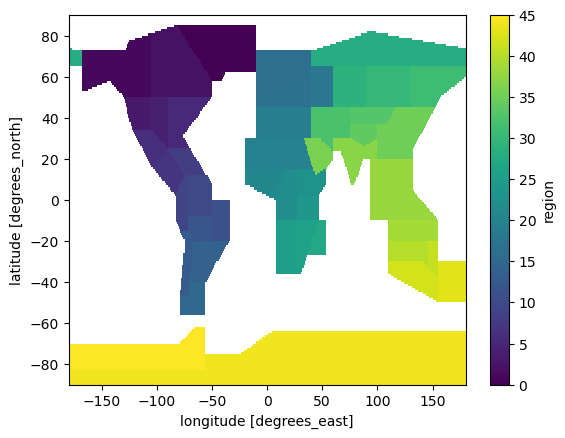

In [21]:
ipcc_mask.plot()

## Get individual bias

## for regional dataset

In [22]:
##defining time slice:
time_slice = slice("2001-01-01", "2015-12-31")

In [23]:

#clim_regional = get_climatology(regional_data_path,variable, time_slice, lat_slice, lon_slice, season, iscale, land_mask, ipcc_mask, ipcc_subregions[region_name])
clim_slice = slice("2001-01-01", "2015-12-31")
clim_regional = get_climatology(regional_path,variable, clim_slice, lat_slice, lon_slice, season, iscale, land_mask, ipcc_mask, None)

In [24]:
ar6_land=regionmask.defined_regions.ar6.land[['SEA', 'EAS', 'ECA', 'TIB', 'SAS']]

In [25]:
regional_map=get_map(regional_path, variable, time_slice, lat_slice, lon_slice, season, iscale, land_mask, ar6_land, None) 

## for insitu data

In [26]:
# Intialize an empty dictionary to store spatial biases as DataArrays
bias_insitu = []
ks_insitu=[]
rmse_insitu=[]

##time slice for calculate bias in  a common period, for individual common period: 1950-2016

# Loop through RCM simulations and calculate the model bias; store in a dictionary
for i, row in insitu_paths_subset.iterrows():
    ##get a common shape between regional and global datasets:
    insitu_map=get_map(row[1], variable, time_slice, lat_slice, lon_slice, season, iscale, land_mask, ar6_land, None)
    common_slices = find_common_slices(regional_map, insitu_map)
    
    #bias map: global_map - regionl_map based on a commom shape
    bias_xr=get_bias(row[1], regional_path, variable, common_slices['time_slice'], common_slices['lat_slice'], common_slices['lon_slice'], season, iscale, land_mask, ar6_land, None) 


    ## test k-s test: 
    regional_ks = get_map(regional_path, variable, common_slices['time_slice'], common_slices['lat_slice'], common_slices['lon_slice'], season, iscale, land_mask, ar6_land, None)
    insitu_ks = get_map(row[1], variable, common_slices['time_slice'], common_slices['lat_slice'], common_slices['lon_slice'], season, iscale, land_mask, ar6_land, None)
    
    ks_xr=ks_test_3d_xarray(regional_ks, insitu_ks)
    
    bias_insitu.append(bias_xr)
    ks_insitu.append(ks_xr)
    ##RMSE 
    rmse=get_rmse(row[1], regional_path, variable, common_slices['time_slice'], common_slices['lat_slice'], common_slices['lon_slice'], season, iscale, land_mask, ar6_land, None)
    ##store bias and p_values in array
    rmse_insitu.append(rmse)
    

## for satellite data

In [29]:
# Intialize an empty dictionary to store model climatologies as DataArrays
bias_sate = []
ks_sate = []
rmse_sate=[]

# Loop through RCM simulations and calculate the model bias; store in a dictionary
for i, row in satellite_paths_subset.iterrows():
    ##get a common shape between regional and global datasets:
    sate_map=get_map(row[1], variable, time_slice, lat_slice, lon_slice, season, iscale, land_mask, ar6_land, None)
    common_slices = find_common_slices(regional_map, sate_map)
    
    #bias map: global_map - regionl_map based on a commom shape
    bias_xr=get_bias(row[1], regional_path, variable, common_slices['time_slice'], common_slices['lat_slice'], common_slices['lon_slice'], season, iscale, land_mask, ar6_land, None) 


    ## test k-s test: 
    regional_ks = get_map(regional_path, variable, common_slices['time_slice'], common_slices['lat_slice'], common_slices['lon_slice'], season, iscale, land_mask, ar6_land, None)
    sate_ks = get_map(row[1], variable, common_slices['time_slice'], common_slices['lat_slice'], common_slices['lon_slice'], season, iscale, land_mask, ar6_land, None)
    
    ks_xr=ks_test_3d_xarray(regional_ks, sate_ks)
    ##storing results
    bias_sate.append(bias_xr)
    ks_sate.append(ks_xr)
    rmse=get_rmse(row[1], regional_path, variable, common_slices['time_slice'], common_slices['lat_slice'], common_slices['lon_slice'], season, iscale, land_mask, ar6_land, None)
    ##store bias and p_values in array
    rmse_sate.append(rmse)
    
    

/jobfs/142313170.gadi-pbs/ipykernel_3409008/1314083247.py:33: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  _, p_value = ks_2samp(d1[mask], d2[mask])
/jobfs/142313170.gadi-pbs/ipykernel_3409008/1314083247.py:33: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  _, p_value = ks_2samp(d1[mask], d2[mask])


## for reanalysis data

In [30]:
# Intialize an empty dictionary to store model climatologies as DataArrays
bias_reanalysis = []
ks_reanalysis = []
rmse_reanalysis = []

# Loop through RCM simulations and calculate the model bias; store in a dictionary
for i, row in reanalysis_paths_subset.iterrows():
    ##get a common shape between regional and global datasets:
    reanalysis_map=get_map(row[1], variable, time_slice, lat_slice, lon_slice, season, iscale, land_mask, ar6_land, None)
    common_slices = find_common_slices(regional_map, reanalysis_map)
    
    #bias map: global_map - regionl_map based on a commom shape
    bias_xr=get_bias(row[1], regional_path, variable, common_slices['time_slice'], common_slices['lat_slice'], common_slices['lon_slice'], season, iscale, land_mask, ar6_land, None) 


    ## test k-s test: 
    regional_ks = get_map(regional_path, variable, common_slices['time_slice'], common_slices['lat_slice'], common_slices['lon_slice'], season, iscale, land_mask, ar6_land, None)
    reanalysis_ks = get_map(row[1], variable, common_slices['time_slice'], common_slices['lat_slice'], common_slices['lon_slice'], season, iscale, land_mask, ar6_land, None)
    
    ks_xr=ks_test_3d_xarray(regional_ks, reanalysis_ks)
    bias_reanalysis.append(bias_xr)
    ks_reanalysis.append(ks_xr)
    rmse=get_rmse(row[1], regional_path, variable, common_slices['time_slice'], common_slices['lat_slice'], common_slices['lon_slice'], season, iscale, land_mask, ar6_land, None)
    ##store bias and p_values in array
    rmse_reanalysis.append(rmse)

/jobfs/142313170.gadi-pbs/ipykernel_3409008/1314083247.py:33: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  _, p_value = ks_2samp(d1[mask], d2[mask])


In [31]:
## combined all climatology map into one array 
part_bias=[*bias_insitu, *bias_sate,*bias_reanalysis]
part_bias

ks_bias=[*ks_insitu, *ks_sate,*ks_reanalysis]
rmse=[*rmse_insitu, *rmse_sate, *rmse_reanalysis]

## Plot figure

In [37]:
from matplotlib.colors import ListedColormap
import matplotlib.colors as colors
##defining colormap for regional climatology, rx1day
norm = colors.BoundaryNorm([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 140, 160], 12)
cmap = ListedColormap(["#ffffd9", "#f4fbc0", "#e4f5b2", "#cdebb4", "#a6dcb7", "#7acbbc", "#54bdc1", "#36abc3", "#2094c0", "#2076b3", "#2258a5", "#243e99", "#1a2b7d", "#081d58"])
##defining colormap for difference 

cmap1=ListedColormap(["#543005", "#794608", "#9d6116", "#bf812d", "#d4ac62", "#e7cf94", "#f6e8c3", 
                     "#c7eae5", "#98d7cd", "#67bbb0", "#35978f", "#12766e", "#01584f", "#003c30"])
norm1 = colors.BoundaryNorm([-35,-30,-25, -20, -15, -10, -5, 0,10, 20,30,40,50,60,70], 14)

In [38]:
#extent=[lonmin1, lonmax1, latmin1, latmax1]
extent = [60, 150, -15, 50]
proj = ccrs.PlateCarree()

# Axes indices where I want lat and/or lon tickmarks on the map
lat_label = [0,4, 8]
lon_label = [13,14,15]
both_label = [12,]

# Lat/Lon values to show for axis labels
lat_ticks = [-15,0,20, 40]
lon_ticks = [70,95, 120, 145]


In [39]:
text=['(b)','(c)','(d)','d','(e)','(f)','(g)','(h)','(i)','(j)','(k)','k','(l)','(m)','(n)', '(o)', '(p)', '(q)', '(r)']

In [40]:
## combined all climatology map into one array 
part_bias_new=[*bias_insitu,bias_insitu[2],*bias_sate, bias_sate[1],*bias_reanalysis]
part_bias_new

ks_bias_new=[*ks_insitu,ks_insitu[2], *ks_sate,ks_sate[1],*ks_reanalysis]
rmse_new=[*rmse_insitu,rmse_insitu[2], *rmse_sate,rmse_sate[1],*rmse_reanalysis]

In [41]:
Name_new=[*insitu_names,insitu_names[2], *satellite_names,satellite_names[1], *reanalysis_names]

/jobfs/142313170.gadi-pbs/ipykernel_3409008/4287023605.py:118: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


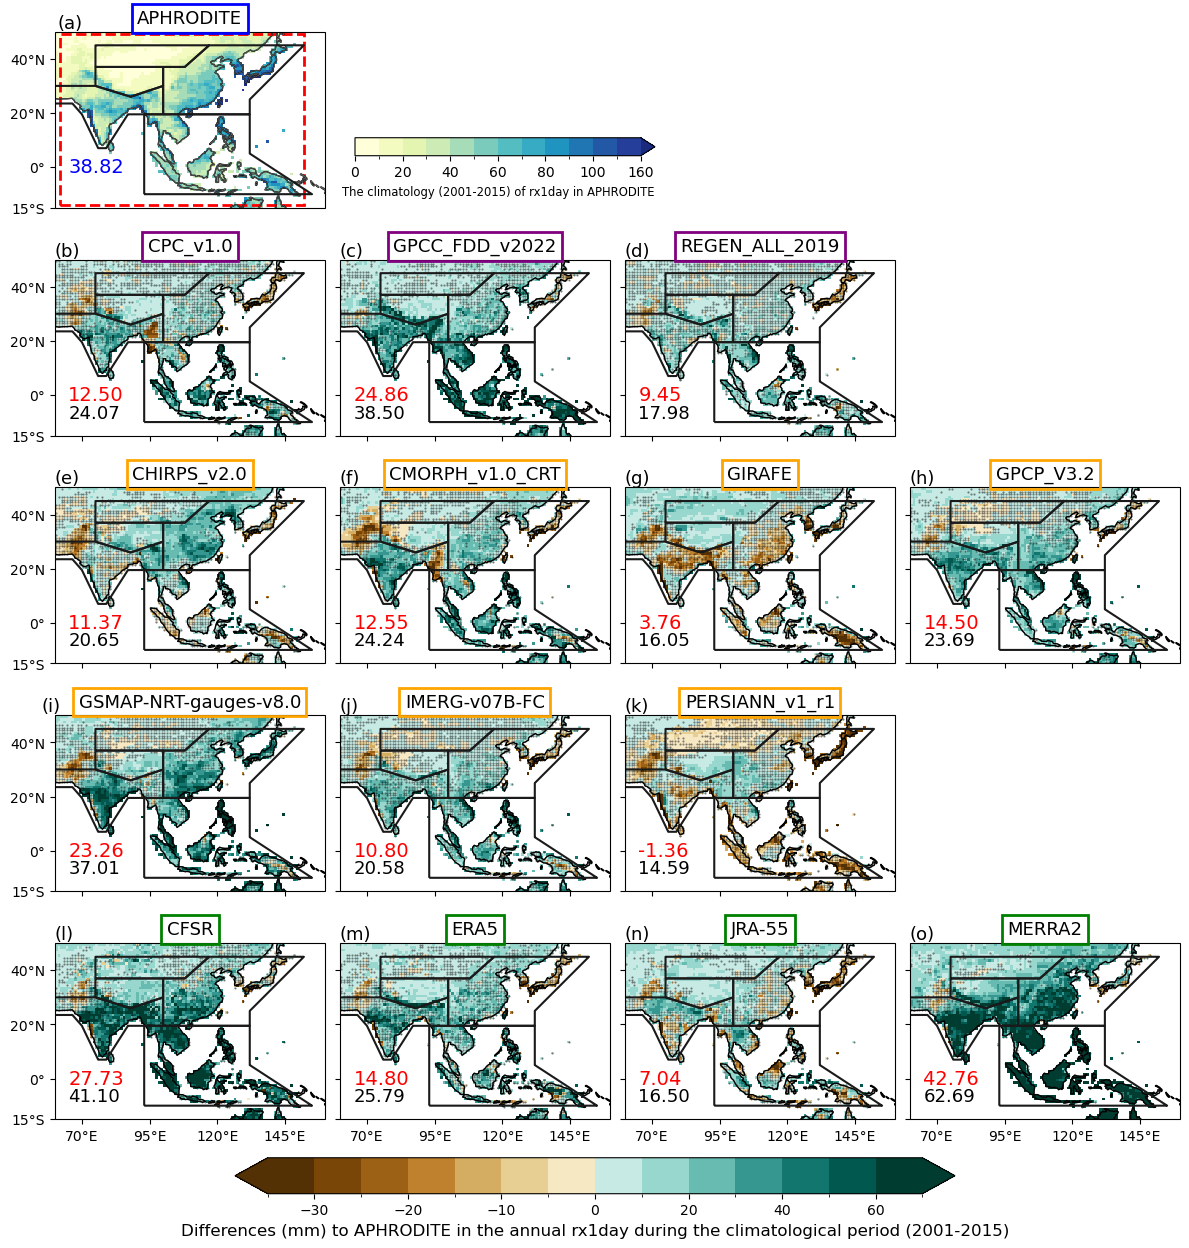

In [43]:
# Define figure size
fig = plt.figure(figsize=(12, 12))

#fig.text(0.5, 0.999, f"Map plots of {variable} over {region_name} in the updated SREX regions in the sixth IPCC assessment report (AR6)", ha='center', wrap=True, fontsize=16)

# Setup axes for all subplots
gs = gridspec.GridSpec(6,4,height_ratios=[1,1,1,1,1,0.1],width_ratios=[1,1,1,1])

row_max = 5
col_max = 3
row = 1
col = 0

axs = {}
##for climatology of Rx1day
axs[regional_names] = fig.add_subplot(gs[0, 0], projection=ccrs.PlateCarree())
my_clim=clim_regional.plot(ax=axs[regional_names],cmap=cmap, norm=norm, transform=ccrs.PlateCarree(),add_colorbar=False)

axs[regional_names].coastlines()
axs[regional_names].yaxis.set_ticklabels([])
axs[regional_names].set_ylabel('')
axs[regional_names].set_yticks(lat_ticks, crs=ccrs.PlateCarree())
lat_formatter = LatitudeFormatter()
axs[regional_names].yaxis.set_major_formatter(lat_formatter)

axs[regional_names].set_title(regional_names,bbox=dict(facecolor='none', edgecolor='blue',boxstyle='square', lw=2), fontsize=13 )
axs[regional_names].text(0.01, 1.1, '(a)',transform=axs[regional_names].transAxes, fontsize=13, color='black', va='top')

mean_region=clim_regional.sel(lon=lon_slice, lat=slice(-15,50)).mean(dim= ('lon','lat'))
axs[regional_names].text(0.05, 0.2, '%.2f' % mean_region.values, fontsize=14, transform=axs[regional_names].transAxes, color='blue')

rectangle = plt.Rectangle((62, -14), 90, 63, 
                          transform=ccrs.PlateCarree(), edgecolor='red', fill=False, lw=2, linestyle='--')
axs[regional_names].add_patch(rectangle)

cax = fig.add_axes([0.3, 0.865, 0.25, 0.015])
cb = fig.colorbar(my_clim, cax=cax, orientation="horizontal",extend='max')
cb.set_label(f"The climatology (2001-2015) of {variable} in {regional_names}", size='small')
ar6_land.plot(ax=axs[regional_names],add_label=False )


# Set up Axes labels (this loops through the sorted Pandas DF to assign axes positions based on wetness)
# For Models
plot = {} 
mean = {}
for i in range(len(part_bias_new)):
    ax = fig.add_subplot(gs[row,col], projection=proj)
    
    if col == col_max:
        row = row + 1
        col = 0 
    else:
        col = col + 1
    
    ar6_land.plot(add_label=False)
    
    plot[Name_new[i]]=part_bias_new[i].plot(ax=ax, add_labels=False, add_colorbar=False, cmap=cmap1,norm=norm1)
    mean[i]=part_bias_new[i].sel(lon=lon_slice, lat=slice(-15,50)).mean(dim= ('lon','lat'))

    ##plot significant 
    lons, lats = np.meshgrid(ks_bias_new[i].lon, ks_bias_new[i].lat)
    sig_area   = np.where(ks_bias_new[i]> 0.05)
    ax.scatter(lons[sig_area], lats[sig_area], marker = '.', s = 1, c = 'black', alpha = 0.5, transform = ccrs.PlateCarree())
    ax.text(0.05, 0.2,  '%.2f' % mean[i].values, fontsize=14, transform=ax.transAxes, color='red')
    ax.text(0.05, 0.1, '%.2f' % rmse_new[i].values, fontsize=13, transform=ax.transAxes)
    
    if (i>=0 and i<4):
        ax.set_title( Name_new[i], loc='center', bbox=dict(facecolor='none', edgecolor='purple',boxstyle='square', lw=2), fontsize=13)

    elif (i>=4 and i< 12): 
        
        ax.set_title(Name_new[i], bbox=dict(facecolor='none', edgecolor='orange',boxstyle='square',lw=2), fontsize=13)
    else: 
        ax.set_title(Name_new[i], bbox=dict(facecolor='none', edgecolor='green',boxstyle='square',lw=2), fontsize=13)
    if (i==8): 
        ax.text(-0.05, 1.1, text[i], transform=ax.transAxes, fontsize=13, color='black', va='top')
    else: 
        ax.text(0, 1.1, text[i], transform=ax.transAxes, fontsize=13, color='black', va='top')
        
    #ax.text(0.03, 1, text[i])
    ax.coastlines()
    ax.set_xticks(lon_ticks, crs=ccrs.PlateCarree())
    ax.set_yticks(lat_ticks, crs=ccrs.PlateCarree())
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    if i in (3,11):
        ax.set_visible(False)
    
    if i in lat_label:
        ax.set_yticks(lat_ticks, crs=ccrs.PlateCarree())
        at_formatter = LatitudeFormatter()
        ax.yaxis.set_major_formatter(lat_formatter)
    elif i in lon_label:
        ax.set_xticks(lon_ticks, crs=ccrs.PlateCarree())
        lon_formatter = LongitudeFormatter(zero_direction_label=True)
        ax.xaxis.set_major_formatter(lon_formatter)
    elif i in both_label:
        ax.set_xticks(lon_ticks, crs=ccrs.PlateCarree())
        ax.set_yticks(lat_ticks, crs=ccrs.PlateCarree())
        lon_formatter = LongitudeFormatter(zero_direction_label=True)
        lat_formatter = LatitudeFormatter()
        ax.xaxis.set_major_formatter(lon_formatter)
        ax.yaxis.set_major_formatter(lat_formatter)
    else:
        continue
    

# Plot colorbars
cbar_gs = gridspec.GridSpecFromSubplotSpec(1,1, subplot_spec=gs[4,:], hspace=0.7)
cbar_ax = fig.add_axes([0.2, 0.0, 0.6, 0.03])
#cbar_ax = fig.add_subplot(cbar_gs[0,0])
plt.colorbar(plot['CHIRPS_v2.0'], cbar_ax, orientation='horizontal', extend='both')

#cbar_ax.set_xlabel(f"Differences to {regional_names} in the the annual {variable} (mm) during the individual common period ",fontsize=12.0)
cbar_ax.set_xlabel(f"Differences (mm) to {regional_names} in the annual {variable} during the climatological period (2001-2015)",fontsize=12.0)

# Plot with tight layout
plt.tight_layout()
plt.savefig("/g/data/w40/pn3424/2024/Lisa/Fig/Jan2025/"+f"KS_DIFF_"+ "MA_" + f"{variable}"+ "_spatial_pattern.png",dpi=300,bbox_inches='tight')
